In [1]:
import pandas as pd
import os
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns
import datetime
import category_encoders as ce
from sklearn.preprocessing import KBinsDiscretizer

# Import all data

In [2]:
#Load data

#Set parameter
dataset = 'train'

#Load data
df_ = pd.read_csv(os.path.join('data',dataset + ".csv"))
df = df_.copy()

df_kills = pd.read_csv(os.path.join('data','kills_columns_grouped.csv'), sep=',')
df_monsters = pd.read_csv(os.path.join('data','monsters_columns_.csv'), sep=',')
df_towers = pd.read_csv(os.path.join('data','towers_columns_.csv'), sep=',')
df_gold = pd.read_csv(os.path.join('data','gold_columns_.csv'), sep=',')

In [3]:
df = pd.merge(df, df_kills,  on = 'game_id', how ='left')
#df = df.merge(df_monsters,  on = 'game_id', how ='left')
#df = df.merge(df_towers,  on = 'game_id', how ='left')
#df = df.merge(df_gold,  on = 'game_id', how ='left')

In [4]:
#First look
display(df.head(5))
df.shape

,Year,Season,blueTeamTag,bResult,redTeamTag,gamelength,game_id,total_kills_b_team,total_kills_r_team
0,2016,Summer,TT,1,HWA,50,b96f782c-da04-4641-9306-68968036bfd9,2.0,0.0
1,2016,Summer,CRW,0,HWA,31,2a7e2cb1-5ac2-4ea2-bd18-0b261e43345a,6.0,0.0
2,2016,Summer,SUP,1,AUR,50,e04ed84d-929b-4f0e-a769-e7bffc2b5162,2.0,2.0
3,2016,Spring,JAG,1,SSB,40,8829614a-313e-413c-9520-d95d7b95af31,NaN,NaN
4,2016,Spring,SIN,0,CHF,36,db2cf98d-a55e-4e28-9702-d7363fad2ebb,0.0,4.0


(4068, 9)

In [5]:
#Drop unecessary columns
df = df.drop(['blueTeamTag','redTeamTag'],axis=1)

In [6]:
#Check data type
df.dtypes

Year                    int64
Season                 object
bResult                 int64
gamelength              int64
game_id                object
total_kills_b_team    float64
total_kills_r_team    float64
dtype: object

In [7]:
#Find columns with nulls values
df.isna().sum()

Year                    0
Season                  0
bResult                 0
gamelength              0
game_id                 0
total_kills_b_team    535
total_kills_r_team    535
dtype: int64

In [8]:
#fill nulls
df['total_kills_b_team'] = df.total_kills_b_team.fillna(0)
df['total_kills_r_team'] = df.total_kills_b_team.fillna(0)

In [9]:
#Cehck columns with nulls values
df.isna().sum()

Year                  0
Season                0
bResult               0
gamelength            0
game_id               0
total_kills_b_team    0
total_kills_r_team    0
dtype: int64

<AxesSubplot:>

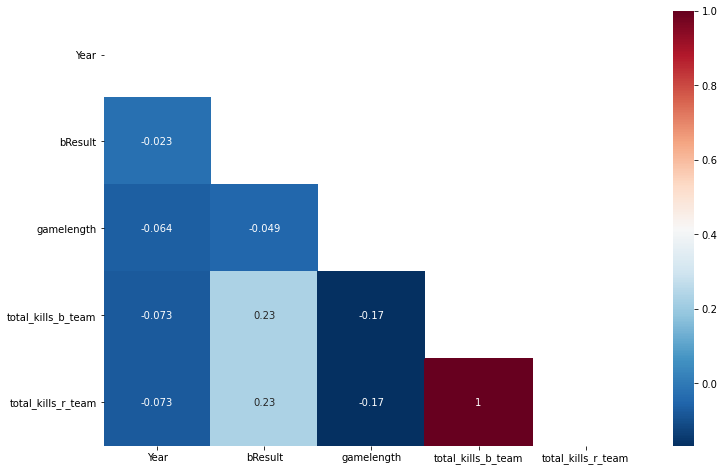

In [10]:
#check correlation
cor_df = df.corr()
lower_triangle_mask = np.triu(np.ones(cor_df.shape)).astype(np.bool)
cor_df_lower = cor_df.mask(lower_triangle_mask)
plt.figure(figsize = (12,8))
sns.heatmap(cor_df_lower, annot = True, cmap = "RdBu_r")

In [11]:
"""
#Check for unique values
categoricals = df.select_dtypes(include='object').columns

number_of_uniques_per_category = df.loc[:, categoricals].nunique()

# little plot 
number_of_uniques_per_category.plot(kind='barh',
                                    title='# uniques / categories');
plt.xlabel('Number of uniques')
plt.show()

number_of_uniques_per_category
"""

"\n#Check for unique values\ncategoricals = df.select_dtypes(include='object').columns\n\nnumber_of_uniques_per_category = df.loc[:, categoricals].nunique()\n\n# little plot \nnumber_of_uniques_per_category.plot(kind='barh',\n                                    title='# uniques / categories');\nplt.xlabel('Number of uniques')\nplt.show()\n\nnumber_of_uniques_per_category\n"

# Encoding

In [12]:
df.dtypes

Year                    int64
Season                 object
bResult                 int64
gamelength              int64
game_id                object
total_kills_b_team    float64
total_kills_r_team    float64
dtype: object

In [13]:
#ENCODING VARIAVEIS CATEGORICAS

#Ordinal Encoder
for f in df.select_dtypes(include='object').columns:
    if f != 'game_id':
        encoder = ce.ordinal.OrdinalEncoder()

        X2 = df[[f]]
        encoder.fit(X2)

        df[f+'_Encode'] = encoder.transform(X2)
        df = df.drop(f,axis=1)


In [14]:
df

,Year,bResult,gamelength,game_id,total_kills_b_team,total_kills_r_team,Season_Encode
0,2016,1,50,b96f782c-da04-4641-9306-68968036bfd9,2.0,2.0,1
1,2016,0,31,2a7e2cb1-5ac2-4ea2-bd18-0b261e43345a,6.0,6.0,1
2,2016,1,50,e04ed84d-929b-4f0e-a769-e7bffc2b5162,2.0,2.0,1
3,2016,1,40,8829614a-313e-413c-9520-d95d7b95af31,0.0,0.0,2
4,2016,0,36,db2cf98d-a55e-4e28-9702-d7363fad2ebb,0.0,0.0,2
...,...,...,...,...,...,...,...
4063,2016,0,35,55f5aa54-756b-4054-bb85-eea3698c2455,0.0,0.0,2
4064,2015,1,52,6005ab0a-0a02-4df6-855d-0b7485a46157,0.0,0.0,2
4065,2016,0,40,fdd3e754-53cc-40d6-8f61-c881e28e920b,2.0,2.0,2
4066,2015,0,36,87e8410f-f028-4186-9c2c-3fe3c2e41fe3,0.0,0.0,1


# Scalling numericals

In [15]:
numericals = df.select_dtypes(include=['int64','float64']).columns
df[numericals].describe()

,Year,bResult,gamelength,total_kills_b_team,total_kills_r_team
count,4068.000000,4068.000000,4068.000000,4068.000000,4068.000000
mean,2015.593904,0.536136,37.507620,3.145526,3.145526
std,0.528771,0.498754,8.004897,3.267210,3.267210
min,2014.000000,0.000000,18.000000,0.000000,0.000000
25%,2015.000000,0.000000,32.000000,0.000000,0.000000
50%,2016.000000,1.000000,37.000000,2.000000,2.000000
75%,2016.000000,1.000000,42.000000,4.000000,4.000000
max,2016.000000,1.000000,81.000000,28.000000,28.000000


In [16]:
"""
##SCALE DE VARIAVEIS NUMERICAS

from sklearn.preprocessing import RobustScaler

#Features to scale

scale_list = ['ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID', 'OP_CARRIER_AIRLINE_ID', 'OP_CARRIER_FL_NUM']


for f in scale_list:
    # initialize transformer with desired options
    robustscaler = RobustScaler()

    # save data to scale
    X_rbs = df[[f]]

    # fit transformer to data
    robustscaler.fit(X_rbs)

    # create new feature by transforming the data
    col_new_name = f + '_robust_scaled'
    df[f] = robustscaler.transform(X_rbs)


#drop original columns
df.drop(scale_list, axis = 1)
df
"""

"\n##SCALE DE VARIAVEIS NUMERICAS\n\nfrom sklearn.preprocessing import RobustScaler\n\n#Features to scale\n\nscale_list = ['ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID', 'OP_CARRIER_AIRLINE_ID', 'OP_CARRIER_FL_NUM']\n\n\nfor f in scale_list:\n    # initialize transformer with desired options\n    robustscaler = RobustScaler()\n\n    # save data to scale\n    X_rbs = df[[f]]\n\n    # fit transformer to data\n    robustscaler.fit(X_rbs)\n\n    # create new feature by transforming the data\n    col_new_name = f + '_robust_scaled'\n    df[f] = robustscaler.transform(X_rbs)\n\n\n#drop original columns\ndf.drop(scale_list, axis = 1)\ndf\n"

In [17]:
df.to_csv('data/' + dataset + '_out.csv', index=False)